# Digit Recognizer
* **Submitted By**: Gaurav Walia 
* **Status** : Completed
* **Dataset** : https://drive.google.com/drive/u/0/folders/1hzz7GUdMd6hztLY2Rgq6KKSTM4G1Y1kc

# Problem Statement

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. 
Our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

### Loading tensorflow library

In [1]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.set_palette("Spectral")

import re
from pprint import pprint
from sklearn import preprocessing 
import string 

import warnings
warnings.filterwarnings(action='ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Loading Data

In [3]:
# Read Dataset
file_name = "train.csv" 
train_df = pd.read_csv(file_name,encoding='utf-8')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The training data is having 784 pixel values along with one label column of digits from 0-9

In [4]:
# Read Dataset
file_name = "test.csv" 
test_df = pd.read_csv(file_name,encoding='utf-8')
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The testing data is having 784 pixel values 

In [5]:
train_df.shape
test_df.shape

(42000, 785)

(28000, 784)

In [6]:
inputData =  train_df.drop('label',axis=1)
y = train_df['label']
y.shape[0]

42000

### Convert Output label to multiple values

In [7]:
inputData = inputData / 255
nDigits = 10

yOneHot = np.zeros([y.shape[0],nDigits])
yOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
InputData_test = test_df/255

In [9]:
range(y.shape[0])
y[0]

range(0, 42000)

1

In [10]:
for i in range(y.shape[0]):
    yOneHot[i,int(y[i])]=1

y = yOneHot

In [11]:
m = 42000
y_train = y[:m,:].reshape(m,nDigits)

In [12]:
inputData = inputData.values
InputData_test = InputData_test.values
InputData_train = inputData[:m,:]
np.random.seed(1002)

In [13]:
InputData_train = inputData

In [14]:
X_train = InputData_train
X_train.shape

(42000, 784)

In [15]:
X_test = InputData_test

In [16]:
y_train.shape
X_train.shape
X_test.shape

(42000, 10)

(42000, 784)

(28000, 784)

## Build the Graph

(-0.5, 27.5, 27.5, -0.5)

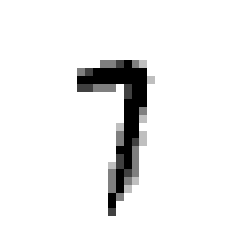

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [23]:
# Show a random input

i = 5029
plt.imshow(InputData_train[i,:].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[i,:])

In [46]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [43]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

#Adding Dense layer
model.add(tf.keras.layers.Dense(120, activation='relu'))

#Adding Dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Adding Dense layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [44]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Build the Graph...

In [47]:
#Adding 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

In [48]:
#Adding 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [49]:
#Adding 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))

In [50]:
#Adding 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))

In [51]:
#Adding OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

## Build the Graph...

In [52]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

## Train the model

In [53]:
model.fit(X_train,y_train,
          epochs=30,
          batch_size=32)

Epoch 1/30
42000/42000 [==============================] - 23s 554us/sample - loss: 0.2695 - acc: 0.9165
Epoch 2/30
42000/42000 [==============================] - 18s 421us/sample - loss: 0.1249 - acc: 0.9607
Epoch 3/30
42000/42000 [==============================] - 20s 484us/sample - loss: 0.0948 - acc: 0.9698
Epoch 4/30
42000/42000 [==============================] - 18s 433us/sample - loss: 0.0732 - acc: 0.9770
Epoch 5/30
42000/42000 [==============================] - 19s 441us/sample - loss: 0.0612 - acc: 0.9807
Epoch 6/30
42000/42000 [==============================] - 20s 477us/sample - loss: 0.0554 - acc: 0.9825
Epoch 7/30
42000/42000 [==============================] - 22s 523us/sample - loss: 0.0497 - acc: 0.9843 
Epoch 8/30
42000/42000 [==============================] - 19s 446us/sample - loss: 0.0439 - acc: 0.9855
Epoch 9/30
42000/42000 [==============================] - 18s 423us/sample - loss: 0.0424 - acc: 0.9865
Epoch 10/30
42000/42000 [==============================] - 18s 

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch multiple                  3136      
_________________________________________________________________
dense_6 (Dense)              multiple                  157000    
_________________________________________________________________
dense_7 (Dense)              multiple                  20100     
_________________________________________________________________
dense_8 (Dense)              multiple                  6060      
_________________________________________________________________
dense_9 (Dense)              multiple                  1830      
_________________________________________________________________
dense_10 (Dense)             multiple                  310       
Total params: 188,436
Trainable params: 186,868
Non-trainable params: 1,568
____________________________________________

In [55]:
#evaluate the model
scores_train = model.evaluate(X_train, y_train, verbose=0)
#scores_test = model.evaluate(X_test, y_test, verbose=0)
print("Train Acc: %.2f%",  (scores_train[1]*100))
#print("Test Acc: %.2f%",  (scores_test[1]*100))

Train Acc: %.2f% 99.69523549079895


In [56]:
type(X_test)

numpy.ndarray

In [57]:
yhat_classes = model.predict_classes(X_test, verbose=0)

In [58]:
yhat_classes

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [59]:
yhat_classes.shape

(28000,)

In [60]:
X_test.shape

(28000, 784)

In [61]:
ImageId = [] 
for i in range(1,28001):
    ImageId.append(i)

# Calling DataFrame constructor on list 
df = pd.DataFrame(ImageId, columns=['ImageId'] )
df.head()

,ImageId
0,1
1,2
2,3
3,4
4,5


In [62]:
df['Label'] = yhat_classes

In [63]:
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [64]:
df.to_csv('Digit.csv',index=False) 

In [65]:
inputData.shape

(42000, 784)

#Adding first convolution layer
model.add(tf.keras.layers.Conv2D(32,#number of filters
                                 kernel_size=(1,1), #size of filter
                                 activation='relu'))
#Adding second convolution layer
model.add(tf.keras.layers.Conv2D(64,#number of filters
                                 kernel_size=(1,1), #size of filter
                                 activation='relu'))
#Adding Maxpooling layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(1,1)))